<a href="https://colab.research.google.com/github/sudhirk999/Projects/blob/master/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout
from keras.layers import Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint   

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 97s 1us/step


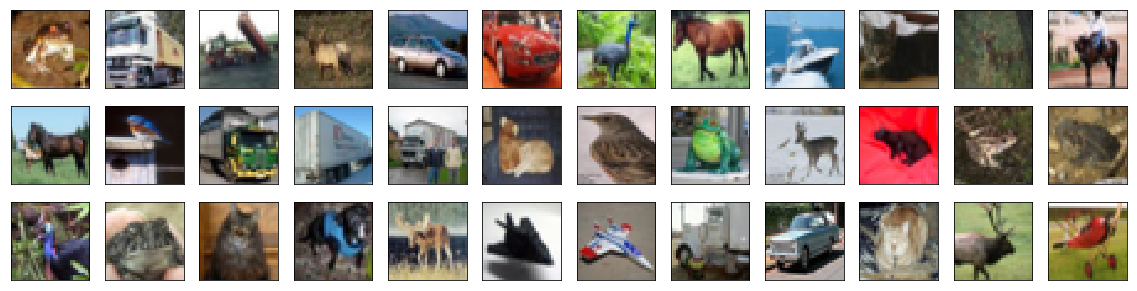

In [3]:
# Visualizing the data


import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


fig = plt.figure(figsize=(20,5))

for i in range(36):
  ax = fig.add_subplot(3, 12, i+1, xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_train[i]))

In [0]:
# Rescaling the images
# rescale [0,255] --> [0,1]
X_train = X_train.astype(np.float32) / 255 
X_test = X_test.astype(np.float32)/ 255

In [0]:
# ONE HOT ENCODING of the target values

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
# Now we will create the validation set

(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [7]:
# Train samples amount
X_train.shape[0]

45000

In [8]:
# Test samples amount
X_test.shape[0]

10000

In [9]:
# validation set amount
X_valid.shape[0]

5000

In [10]:
## Model Architecture

model = Sequential()
model.add(Conv2D(filters=16,
                 kernel_size=2,
                 padding='same',
                 activation='relu',
                 input_shape=(X_train.shape[1:])))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,
                 kernel_size=2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,
                 kernel_size=2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxP

In [0]:
# Compling the model

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [12]:
# Training the model and saving the best weights

checkpointer = ModelCheckpoint(filepath='cifar_model.weights.best.hdf5',
                              verbose=1,
                              save_best_only=True)

model_hist = model.fit(X_train,
                       y_train,
                       validation_data=(X_valid, y_valid),
                       verbose=2,
                       callbacks=[checkpointer],
                       shuffle=True,
                       epochs=100)


Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 12s - loss: 1.5950 - acc: 0.4212 - val_loss: 1.3049 - val_acc: 0.5268

Epoch 00001: val_loss improved from inf to 1.30488, saving model to cifar_model.weights.best.hdf5
Epoch 2/100
 - 6s - loss: 1.2702 - acc: 0.5485 - val_loss: 1.1840 - val_acc: 0.5866

Epoch 00002: val_loss improved from 1.30488 to 1.18403, saving model to cifar_model.weights.best.hdf5
Epoch 3/100
 - 7s - loss: 1.1536 - acc: 0.5923 - val_loss: 1.2011 - val_acc: 0.5804

Epoch 00003: val_loss did not improve from 1.18403
Epoch 4/100
 - 6s - loss: 1.0962 - acc: 0.6158 - val_loss: 1.0561 - val_acc: 0.6370

Epoch 00004: val_loss improved from 1.18403 to 1.05614, saving model to cifar_model.weights.best.hdf5
Epoch 5/100
 - 7s - loss: 1.0624 - acc: 0.6312 - val_loss: 1.0741 - val_acc: 0.6160

Epoch 00005: val_loss did not improve from 1.05614
Epoch 6/100
 - 6s - loss: 1.0320 - acc: 0.6434 - val_loss: 0.9488 - val_a

In [0]:
# Loading the best weights that yields the best validation accuracy
model.load_weights('cifar_model.weigths.best.hdf5')

In [14]:
# Accuracy of Test sets

score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names,':',score)
print('Accuracy of Test is:',100*score[1])

['loss', 'acc'] : [1.6710503986358642, 0.3842]
Accuracy of Test is: 38.42


Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects

In [0]:
# get predictions on the test set
y_hat = model.predict(X_test)

# define text labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 
                  'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


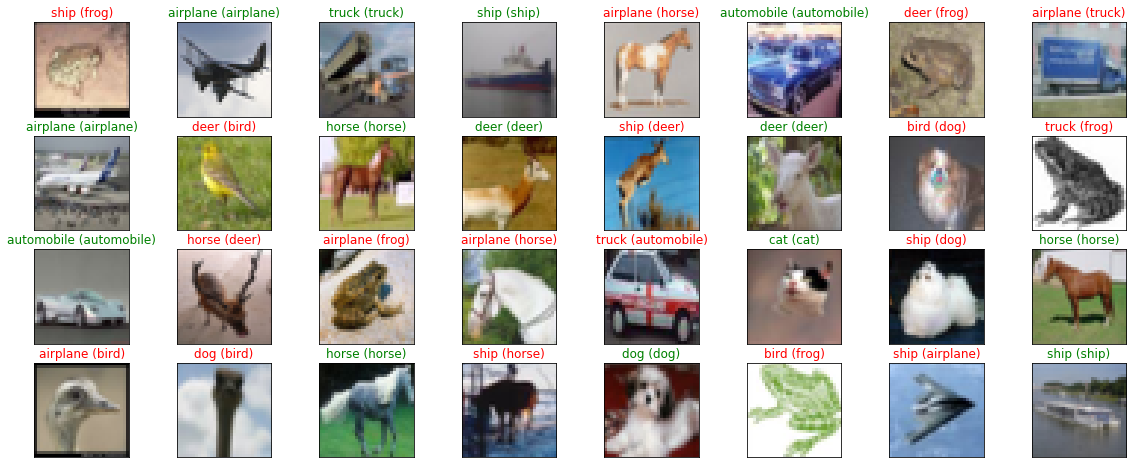

In [16]:
# plot a random sample of test images, their predicted labels,
# and ground truth

fig = plt.figure(figsize=(20,8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
